<a href="https://colab.research.google.com/github/jhlopesalves/data-science-notebooks/blob/main/Python/projects/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

## Dataset Description

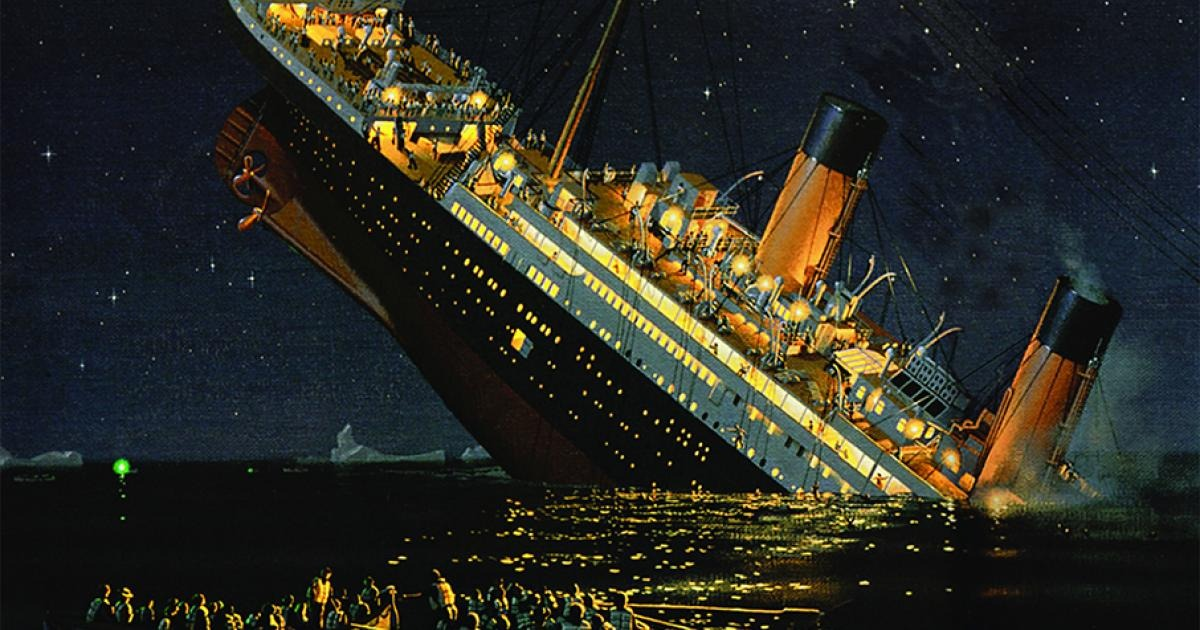

### Overview
The data for this task is split into three files:

- **Training set** (`train.csv`): This dataset is used to build your machine learning models. It includes the outcome (ground truth) for each passenger, indicating whether they survived or not. It contains features like gender, class, and others. You can also engineer new features from the existing ones.
- **Test set** (`test.csv`): This dataset is used to evaluate the performance of your model on unseen data. It does not include the ground truth for survival. Your task is to predict the survival outcome for each passenger in this set.
- **Gender submission** (`gender_submission.csv`): This file is an example submission in the correct format. It assumes all female passengers survived and all male passengers did not.

### Data Dictionary
This table describes the different variables (features) in the dataset:

| Variable   | Definition                  | Key                                                                 |
|------------|-----------------------------|---------------------------------------------------------------------|
| survival  | Survival                    | 0 = No, 1 = Yes                                                    |
| pclass    | Ticket class                | 1 = 1st, 2 = 2nd, 3 = 3rd                                          |
| sex       | Sex                         | male or female                                                      |
| Age       | Age in years                | Can be fractional if less than 1. Estimated ages are in the form xx.5. |
| sibsp     | # of siblings/spouses aboard| Number of siblings or spouses aboard. Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés ignored). |
| parch     | # of parents/children aboard| Number of parents or children aboard. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children traveled only with a nanny, so parch=0 for them. |
| ticket    | Ticket number               |                                                                     |
| fare      | Passenger fare              |                                                                     |
| cabin     | Cabin number                |                                                                     |
| embarked  | Port of Embarkation         | C = Cherbourg, Q = Queenstown, S = Southampton                      |

### Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper Class
  - 2nd = Middle Class
  - 3rd = Lower Class

## Getting Started

To begin, you can load the `train.csv` and `test.csv` files into pandas DataFrames to explore the data and start building your survival prediction model.

Once loaded, you can start exploring the data using methods like `.head()`, `.info()`, and `.describe()` to understand its structure, data types, and summary statistics. Good luck!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_url = "https://raw.githubusercontent.com/jhlopesalves/data-science-notebooks/refs/heads/main/Python/projects/titanic/data/train.csv"
train_df = pd.read_csv(train_url, usecols=lambda col: not col.startswith("Unnamed"))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_url = "https://raw.githubusercontent.com/jhlopesalves/data-science-notebooks/refs/heads/main/Python/projects/titanic/data/test.csv"
test_df = pd.read_csv(test_url, usecols=lambda col: not col.startswith("Unnamed"))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
